In [1]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img1 = cv2.imread('../images/taj_mahal_1.jpeg')  
img2 = cv2.imread('../images/taj_mahal_2.jpeg')  

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create(nOctaveLayers=5)

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

[ WARN:0@0.317] global shadow_sift.hpp:15 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


(3794, 3378)

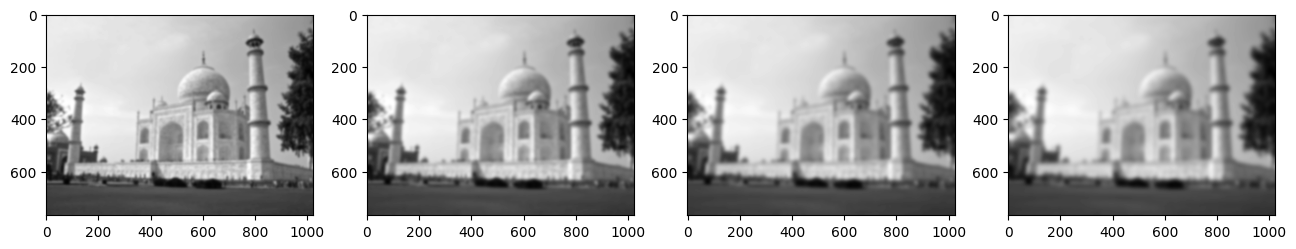

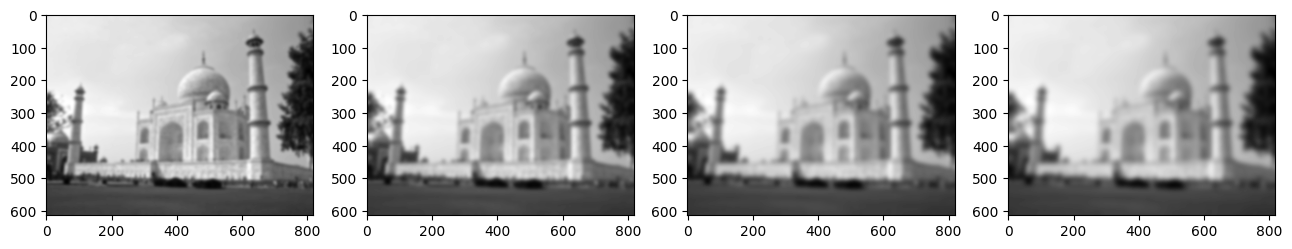

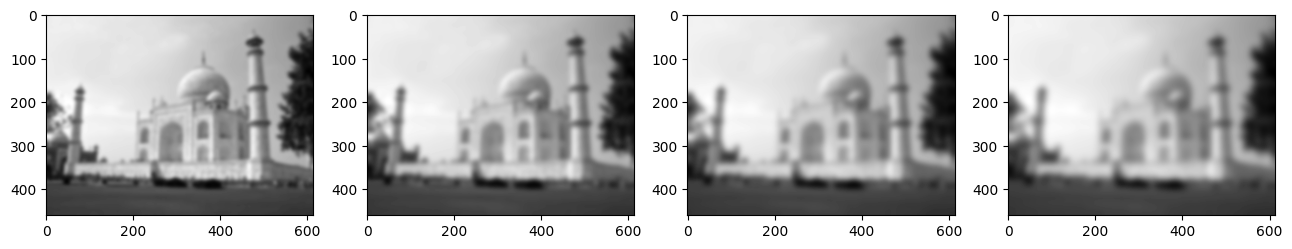

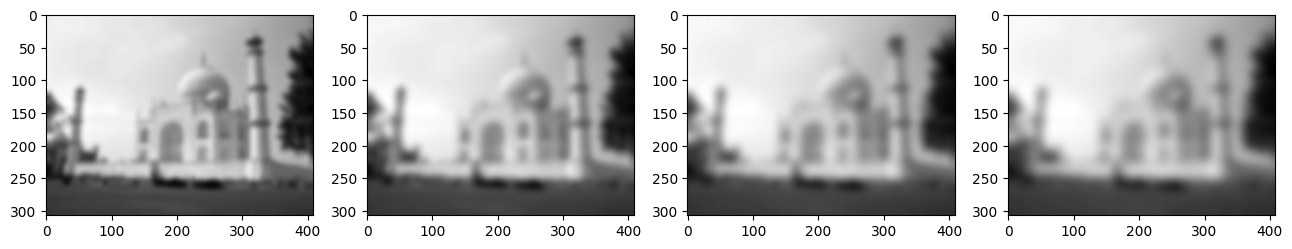

In [3]:
scale_percent = [100,80, 60, 40] # percent of original size
for count, scale in enumerate(scale_percent,1):
    width = int(img1.shape[1] * scale / 100)
    height = int(img1.shape[0] * scale / 100)
    dim = (width, height)
    fig = plt.figure(figsize=(20,20))
    resized_im = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
    blur_image = resized_im
    for i in range(1, 5):
        ax = fig.add_subplot(count, 5, i)
        blur_image = cv2.GaussianBlur(blur_image,(0,0),cv2.BORDER_DEFAULT)
        ax.imshow(blur_image, cmap="gray")
plt.show()

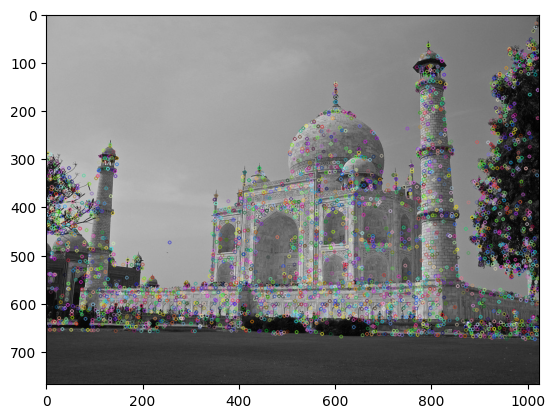

In [4]:
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(img1,keypoints_1,img1)
plt.imshow(img_1)

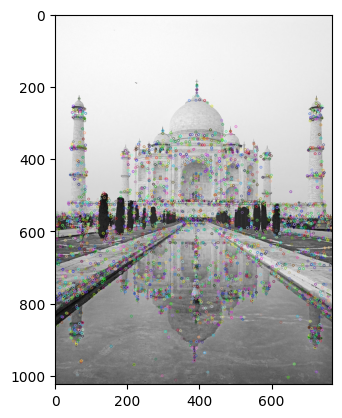

In [5]:
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

img_2 = cv2.drawKeypoints(img2,keypoints_2,img2)
plt.imshow(img_2)

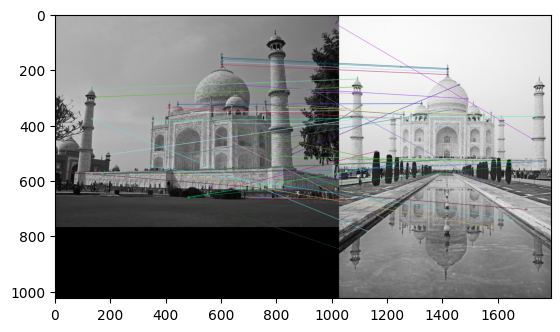

(<matplotlib.image.AxesImage at 0x13ebedee0>, None)

In [6]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()